MULTIPLE SUBPLOTS
- plt.axes: creating an axes by HAND
- plt.subplot: create a single subplot within a grid. Three arguments: the number of rows, the number of columns, and the index of the plot.
- plt.subplots: The Whole Grid in One Go
- plt.GridSpec: More Complicated Arrangements

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

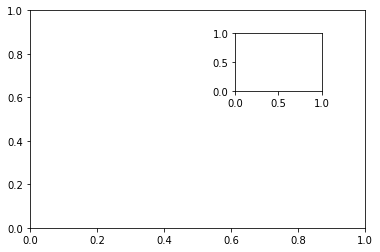

In [3]:
ax1 = plt.axes()
ax2 = plt.axes([0.6,0.6,0.2,0.2])

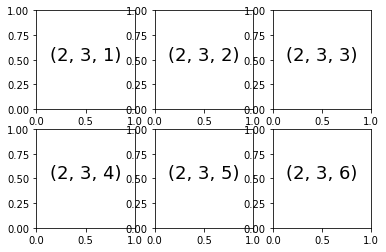

In [27]:
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5,0.5,str((2,3,i)),fontsize=18,ha='center')

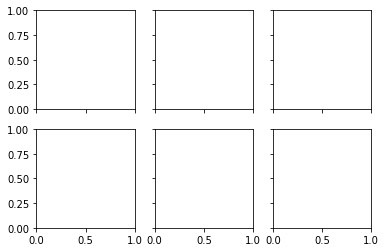

In [20]:
fig, ax = plt.subplots(2,3,sharex='col',sharey='row')

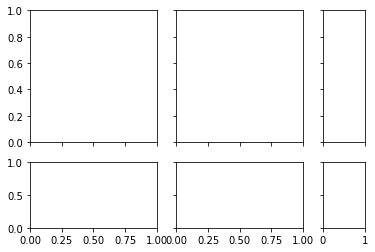

In [19]:
fig, ax = plt.subplots(2,3,sharex='col',sharey='row',width_ratios = [3,3,1],height_ratios = [2,1])

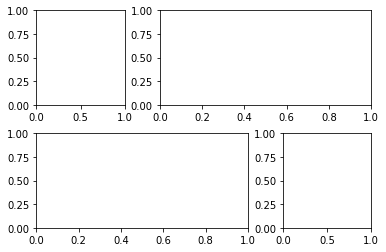

In [43]:
#plt.GridSpec: doesn't create a plot by itself
grid = plt.GridSpec(2,3, wspace = 0.4,hspace = 0.3)
plt.subplot(grid[0,0])
plt.subplot(grid[0,1:])
plt.subplot(grid[1,:2])
plt.subplot(grid[1,2]);


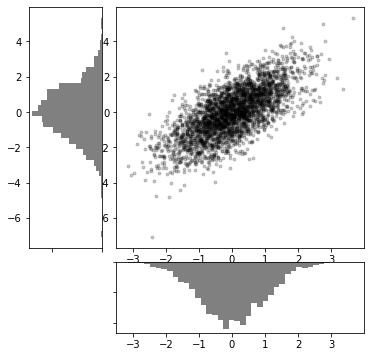

In [44]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)
# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
orientation='vertical', color='gray')
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled',
orientation='horizontal', color='gray')
y_hist.invert_xaxis()

TEXT AND ANNOTATION

ax.text(): Add the text s to the Axes at location x, y in data coordinates.
- Parameters:
  - x,y: float, the position to place the text.
  - s: the text.
- Other parameters: Text Properties
    - color or c: color
    - fontsize: float or {'x-small','small','medium','large','x-large','xx-large'}
    - fontstyle: {'normal','italic','olique'}

In [25]:
births = pd.read_csv('D:\\Data Preparation\\Data\\births.txt',sep = ',')

In [26]:
births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [28]:
import datetime as dt

Text(2012-7-1, 4200, 'Independence Day')

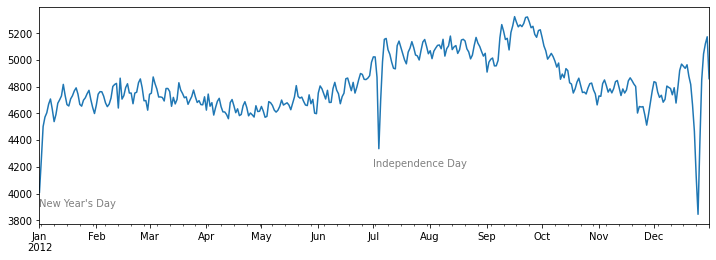

In [40]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
# births_by_date = births.pivot_table('births',
# [births.index.month, births.index.day])
births_by_date = births.groupby(['month','day']).births.mean()
births_by_date.index = [dt.datetime(2012, month, day)
for (month, day) in births_by_date.index]
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);
#Add labels to the plot

style = dict(size =  10,color = 'gray',fontstyle='normal')
ax.text('2012-1-1',3900,"New Year's Day",**style)
ax.text('2012-7-1',4200,"Independence Day",**style)

TRANSFORMATIONS AND TEXT POSITION
In the previous example, we anchored our text annotations to data locations. Some‐times it’s preferable to anchor the text to a position on the axes or figure, independent of the data. In Matplotlib, we do this by modifying the transform.
- ax.transData: Transform associated with data coordinates
- ax.transAxes: Transform associated with the axes (in units of axes dimensions)
- fig.transFigure: Transform associated with the figure (in units of figure dimensions)

ANNOTATION with ARROWS
AX.ANNOTATE():
- text: the text of the annotation
- xy: the point (x,y) to annotate.
- xytext: the position (x,y) to place the text at.
- shrink: move the tip and base some percent away from the annotated point and text.
- arrowprops: draw an arrow between the position xy and xytext.
   - width
   - shrink: Fraction of total length to shrink from both ends
   - connectionstyle:...

<div style="width:image width px; font-size:100%; text-align:center;"><img src='angle.png' alt="alternate text" width="width" height="height" style="width:600px;height:450px;" /> Figure 1 </div>

Text(2, -6, 'local minimum')

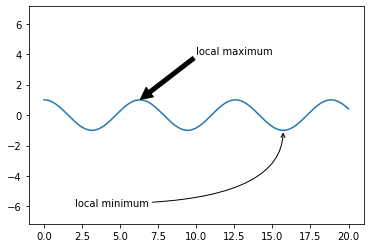

In [31]:
fig,ax = plt.subplots()
x = np.linspace(0,20,1000)
ax.plot(x,np.cos(x))
ax.axis('equal')

ax.annotate('local maximum',xy=(6.28,1),xytext=(10,4),\
           arrowprops = dict(facecolor='black',shrink=0.01))
ax.annotate('local minimum',xy=(5*np.pi,-1),xytext=(2,-6),\
           arrowprops = dict(arrowstyle = '->',\
                             connectionstyle = 'angle3,angleA=0,angleB=90'))


ANNOTATING WITH BOXED TEXT
Text takes bbox keyword argument, which draws a box around the text:
- The box style: circle, darrow, ellipse, larrow, rarrow, round,square
<div style="width:image width px; font-size:100%; text-align:center;"><img src='boxed_text.png' alt="alternate text" width="width" height="height" style="width:500px;height:250px;" /> Figure 1 </div>

Text(20, 50, 'Annotation')

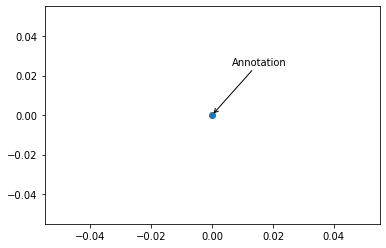

In [47]:
x1,y1 = 0,0
x2,y2 = 20,50
fig, ax = plt.subplots()
ax.scatter(x1,y1)
ax.annotate("Annotation",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='black')
            )

Text(2012-7-6, 3950, 'Independence Day')

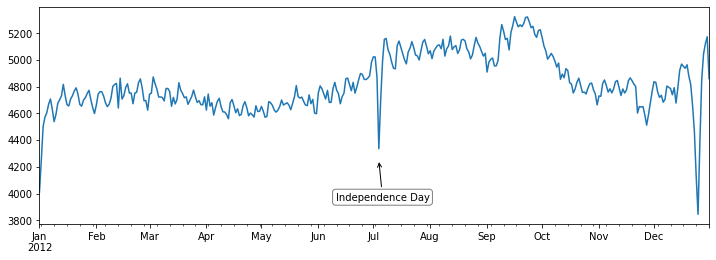

In [54]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)
ax.annotate("Independence Day", xy=('2012-7-4', 4250),xycoords='data',\
           bbox=dict(boxstyle="round", fc="none", ec="gray"),xytext=('2012-7-6',3950),ha='center',
arrowprops=dict(arrowstyle="->"))
# ax.get_xticklabels()
# Use xytext=(x,y) to set the coordinates of the text. You can provide these coordinates in absolute\
# values (in data, axes, or figure coordinates), \
# or in relative position using textcoords="offset points" for example.

Annotated average birth rates by day
<div style="width:image width px; font-size:100%; text-align:center;"><img src='births_by_day.png' alt="alternate text" width="width" height="height" style="width:750px;height:250px;" /> Figure 1 </div>

# CUSTOMIZING TICKS

REMOVE THE AXES:
- axes.spines[position].set_visible(bool)
- position: left, right, top, bottom

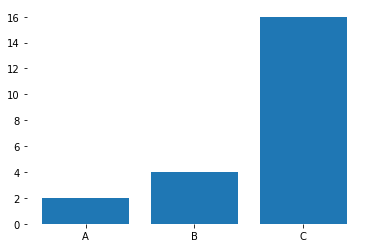

In [6]:
#EXAMPLE
fig, ax = plt.subplots()
ax.bar(['A','B','C'],[2,4,16])
ax.spines[['left','right','top','bottom']].set_visible(False)

# Manipulate Ticks and Labels

Hide ticks:
- AXES.TICK_PARAMS()
Move the tick labels at the top of the graph:
- ax.xaxis.tick_top()
Remove some of the x-tick labels:
- ax.set_xticks()

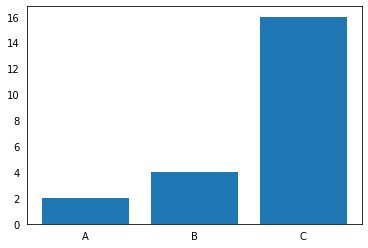

In [19]:
fig, ax = plt.subplots()
ax.bar(['A','B','C'],[2,4,16])
ax.tick_params(bottom=False,left=False)

To color the x-tick labels, we use the parameter color in the  axes.tick_params()  method
 - Ax.tick_params(axis=‘x’, color=‘grey’)


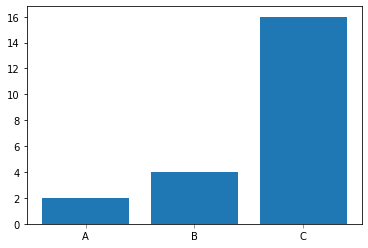

In [15]:
fig, ax = plt.subplots()
ax.bar(['A','B','C'],[2,4,16])
ax.tick_params(axis='x',color='grey')

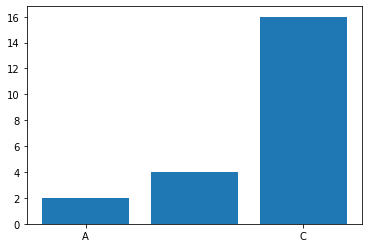

In [22]:
fig, ax = plt.subplots()
ax.bar(['A','B','C'],[2,4,16])
ax.set_xticks(['A','C'])

REMOVE XTICK_LABELS?
CHANGE XTICK_LABELS?

C:\Users\DELL\AppData\Local\Temp/ipykernel_7232/1929504879.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['a','b','c'])


[Text(0, 0, 'a'), Text(1, 0, 'b'), Text(2, 0, 'c')]

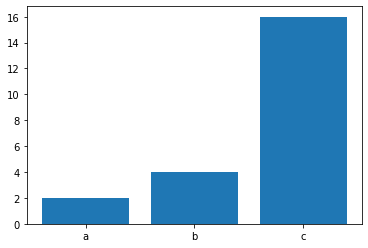

In [24]:
fig, ax = plt.subplots()
ax.bar(['A','B','C'],[2,4,16])
ax.set_xticklabels(['a','b','c'])

ADD LABEL

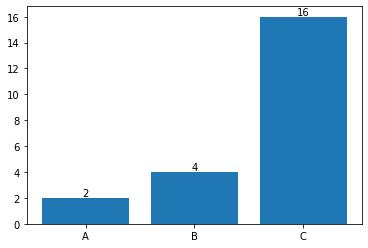

In [68]:
fig, ax = plt.subplots()
pps = ax.bar(['A','B','C'],[2,4,16])
for p in pps:
    height = p.get_height()
    ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      ha='center', va='bottom')
